In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats

In [2]:
meets = pd.read_csv('/home/jan-willem/Documents/kaggle beginner projects/powerlifting dataset/openpowerlifting-2024-01-06-4c732975.csv')

/tmp/ipykernel_1485191/4150487169.py:1: DtypeWarning: Columns (31,33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  meets = pd.read_csv('/home/jan-willem/Documents/kaggle beginner projects/powerlifting dataset/openpowerlifting-2024-01-06-4c732975.csv')


In [3]:
meets.head(5)

Name Sex Event Equipment   Age AgeClass BirthYearClass  \
0             Alona Vladi   F   SBD       Raw  33.0    24-34          24-39   
1      Galina Solovyanova   F   SBD       Raw  43.0    40-44          40-49   
2          Daniil Voronin   M   SBD       Raw  15.5    16-17          14-18   
3          Aleksey Krasov   M   SBD       Raw  35.0    35-39          24-39   
4  Margarita Pleschenkova   M   SBD       Raw  26.5    24-34          24-39   

  Division  BodyweightKg WeightClassKg  ...  Tested  Country  State  \
0        O         58.30            60  ...     Yes   Russia    NaN   
1       M1         73.10            75  ...     Yes   Russia    NaN   
2        T         67.40            75  ...     Yes   Russia    NaN   
3        O         66.65            75  ...     Yes   Russia    NaN   
4        O         72.45            75  ...     Yes   Russia    NaN   

   Federation  ParentFederation        Date  MeetCountry  MeetState  MeetTown  \
0         GFP               NaN  2019-05-11       Russia        NaN   Bryansk   
1         GFP               NaN  2019-05-11       Russia        NaN   Bryansk   
2         GFP               NaN  2019-05-11       Russia        NaN   Bryansk   
3         GFP               NaN  2019-05-11       Russia        NaN   Bryansk   
4         GFP               NaN  2019-05-11       Russia        NaN   Bryansk   

          MeetName  
0  Open Tournament  
1  Open Tournament  
2  Open Tournament  
3  Open Tournament  
4  Open Tournament  

[5 rows x 41 columns]

In [4]:
meets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043013 entries, 0 to 3043012
Data columns (total 41 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Name              object 
 1   Sex               object 
 2   Event             object 
 3   Equipment         object 
 4   Age               float64
 5   AgeClass          object 
 6   BirthYearClass    object 
 7   Division          object 
 8   BodyweightKg      float64
 9   WeightClassKg     object 
 10  Squat1Kg          float64
 11  Squat2Kg          float64
 12  Squat3Kg          float64
 13  Squat4Kg          float64
 14  Best3SquatKg      float64
 15  Bench1Kg          float64
 16  Bench2Kg          float64
 17  Bench3Kg          float64
 18  Bench4Kg          float64
 19  Best3BenchKg      float64
 20  Deadlift1Kg       float64
 21  Deadlift2Kg       float64
 22  Deadlift3Kg       float64
 23  Deadlift4Kg       float64
 24  Best3DeadliftKg   float64
 25  TotalKg           float64
 26  Place         

In [5]:
# from what time does this data set range? When and where are meets held?

In [6]:
# by year and month

In [7]:
meets['Date2'] = pd.to_datetime(meets.Date)

In [8]:
meets['Year'] = meets['Date2'].dt.year

In [9]:
meets['Month'] = meets['Date2'].dt.month

Text(0, 0.5, 'Number of meets')

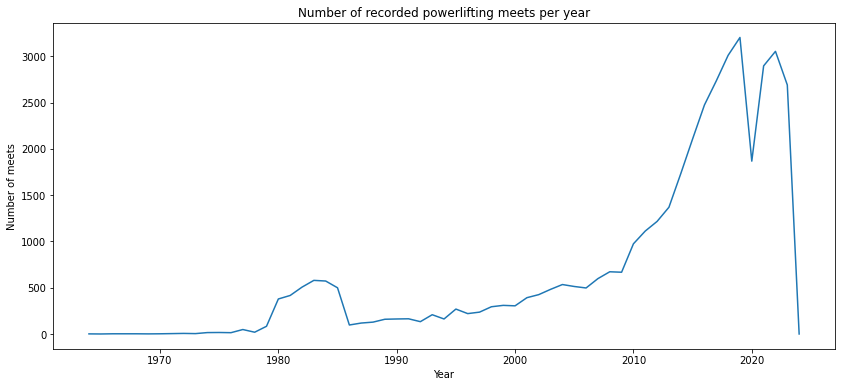

In [10]:
years = meets.groupby(['Year'])['MeetName'].nunique().index
counts = meets.groupby(['Year'])['MeetName'].nunique()
plt.figure(figsize=(14,6))
plt.plot(years, counts)
plt.title('Number of recorded powerlifting meets per year')
plt.xlabel('Year')
plt.ylabel('Number of meets')

In [11]:
meets_by_month = meets.groupby(['Year', 'Month'])['MeetName'].nunique().reset_index()
meets_by_month.rename(columns={'MeetName':'Count'}, inplace=True)
meets_by_month

Year  Month  Count
0    1964      9      1
1    1964     11      1
2    1965      9      1
3    1966      2      1
4    1966      9      1
..    ...    ...    ...
615  2023      9    238
616  2023     10    243
617  2023     11    236
618  2023     12    207
619  2024      1      1

[620 rows x 3 columns]

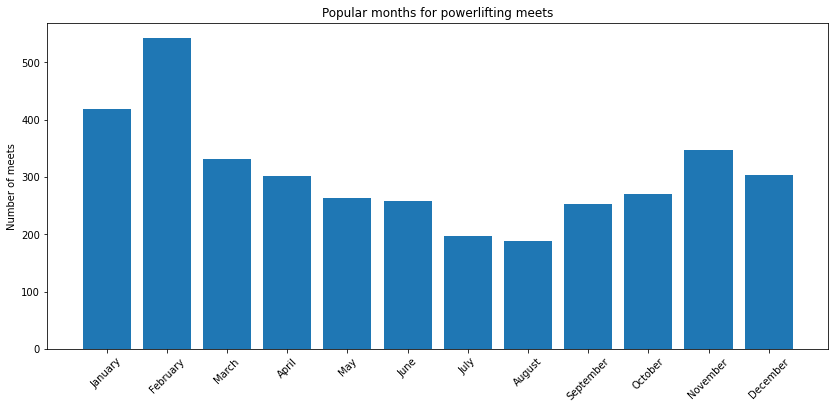

In [12]:
fig, ax = plt.subplots(figsize=(14,6))
ax.bar(meets_by_month['Month'], meets_by_month['Count'])
m_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12], labels = m_months, rotation=45)
ax.set_ylabel('Number of meets')
plt.title('Popular months for powerlifting meets')
plt.show()

In [13]:
# average number of contestants in meets over the years

In [14]:
avg_meetsize_by_year = (meets.groupby(['Year'])['MeetName'].count() / meets.groupby(['Year'])['MeetName'].nunique()).reset_index()
avg_meetsize_by_year.rename(columns={'MeetName':'AverageMeetSize'}, inplace=True)
avg_meetsize_by_year

Year  AverageMeetSize
0   1964        19.500000
1   1965        45.000000
2   1966        23.666667
3   1967        31.333333
4   1968        36.000000
..   ...              ...
56  2020        74.782120
57  2021        61.590266
58  2022        66.519646
59  2023        66.507618
60  2024        20.000000

[61 rows x 2 columns]

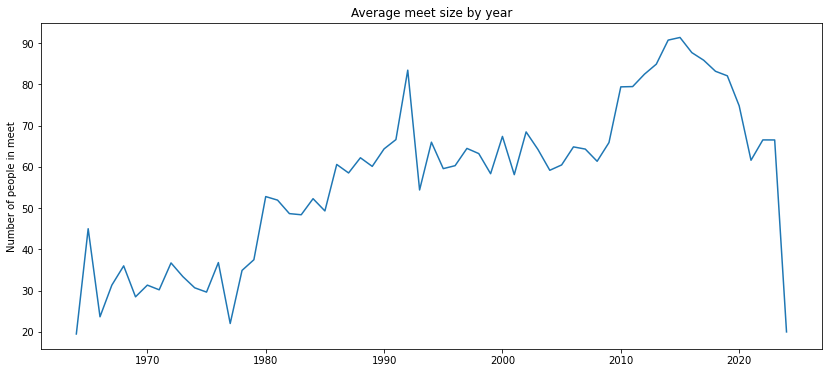

In [15]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(avg_meetsize_by_year['Year'], avg_meetsize_by_year['AverageMeetSize'])
ax.set_title('Average meet size by year')
ax.set_ylabel('Number of people in meet')
plt.show()

In [16]:
# does average tonnage lifted increase over the years?
average_tonnage_per_meet_attendee_per_year = (meets.groupby(['Year'])['TotalKg'].sum() / meets.groupby(['Year'])['MeetName'].count()).reset_index()
average_tonnage_per_meet_attendee_per_year.rename(columns={0:'AverageTonnagePerMeet'}, inplace=True)
average_tonnage_per_meet_attendee_per_year

Year  AverageTonnagePerMeet
0   1964             348.395641
1   1965             567.106667
2   1966             534.713803
3   1967             508.808617
4   1968             411.102130
..   ...                    ...
56  2020             339.967471
57  2021             357.480112
58  2022             387.333833
59  2023             394.905718
60  2024             441.250000

[61 rows x 2 columns]

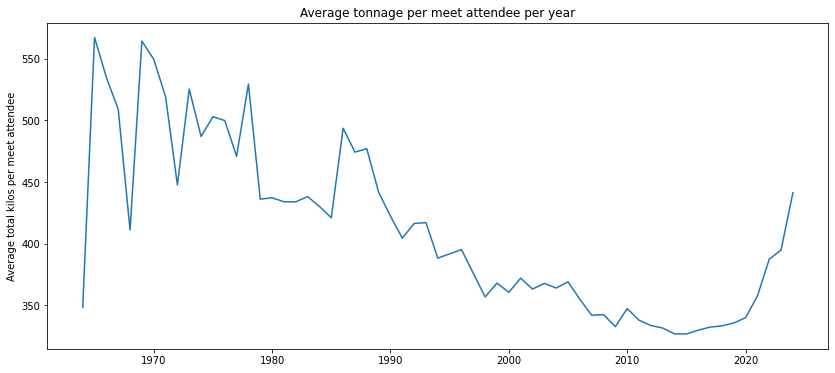

In [17]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(average_tonnage_per_meet_attendee_per_year['Year'], 
        average_tonnage_per_meet_attendee_per_year['AverageTonnagePerMeet'])
ax.set_title('Average tonnage per meet attendee per year')
ax.set_ylabel('Average total kilos per meet attendee')
plt.show()

In [18]:
# development of Wilks score over time (percentiles)
bottom20 = meets.groupby(['Year'])['Wilks'].quantile(0.20).reset_index()
bottom20.rename(columns={'Wilks':'Bottom20medianWilks'}, inplace=True)
median50 = meets.groupby(['Year'])['Wilks'].quantile(0.50).reset_index()
median50.rename(columns={'Wilks':'Median50medianWilks'}, inplace=True)
top80 = meets.groupby(['Year'])['Wilks'].quantile(0.80).reset_index()
top80.rename(columns={'Wilks':'Top80medianWilks'}, inplace=True)
quantileWilks = pd.concat([bottom20, median50['Median50medianWilks'], top80['Top80medianWilks']], axis=1)
quantileWilks

Year  Bottom20medianWilks  Median50medianWilks  Top80medianWilks
0   1964               85.510              389.100           416.290
1   1965              363.910              406.325           434.334
2   1966              379.486              402.170           437.280
3   1967              362.504              411.475           445.098
4   1968              106.880              390.190           455.080
..   ...                  ...                  ...               ...
56  2020              155.100              293.610           369.760
57  2021              142.150              302.150           383.920
58  2022              179.506              319.560           390.420
59  2023              173.336              329.450           398.370
60  2024              211.830              358.200           390.058

[61 rows x 4 columns]

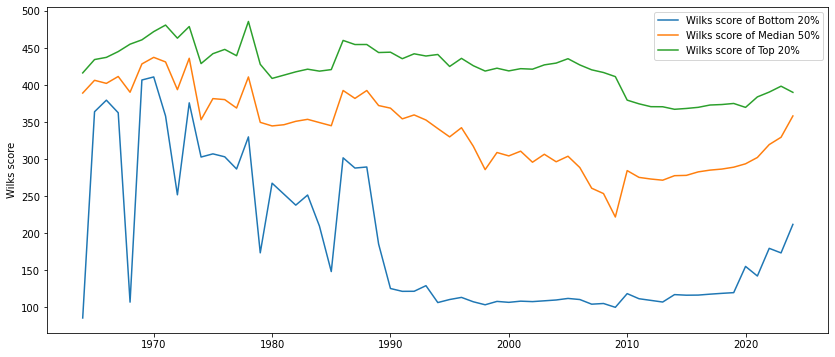

In [19]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(quantileWilks['Year'], quantileWilks['Bottom20medianWilks'], label='Wilks score of Bottom 20%')
ax.plot(quantileWilks['Year'], quantileWilks['Median50medianWilks'], label='Wilks score of Median 50%')
ax.plot(quantileWilks['Year'], quantileWilks['Top80medianWilks'], label='Wilks score of Top 20%')
ax.legend()
ax.set_ylabel('Wilks score')
plt.show()

In [20]:
# where do top lifters compete? does number of elite meets increase as well?

In [21]:
meets.groupby('MeetName')['Wilks'].mean().sort_values(ascending=False)[:25]

MeetName
Bullfarm Championships                                       662.980000
BullFarm Powerlifting Championships                          642.752000
WPO Super Finals                                             628.088015
Westside Pro Invitational Powerlifting Championships         625.488400
Rock Powerlifting Meet                                       625.140000
WPO Semifinals                                               624.327188
Westside Invitational Pro Open Powerlifting Championships    616.670870
Super-Cup of Titans                                          615.193243
WPO Super Open Championships                                 604.991765
WPO Semi-Finals                                              601.697468
WPO Finals                                                   597.436959
WPO European Semi Finals                                     596.328000
Golden Ton International Tournament                          595.648571
WPO Championships                                      

In [22]:
meanMeetWilks = meets.groupby(['MeetName', 'Date'])[['Wilks', 'Date', 'MeetName']].agg({'Wilks':np.mean, 'Date':lambda x: x.iloc[0],
                                                                                       'MeetName':lambda x:x.iloc[0]})
meanMeetWilks = meanMeetWilks[['Wilks', 'Date', 'MeetName']].reset_index(drop=True)
meanMeetWilks = meanMeetWilks.sort_values('Date')
meanMeetWilks['Date'] = pd.to_datetime(meanMeetWilks['Date'])
meanMeetWilks['Year'] = meanMeetWilks['Date'].dt.year
meanMeetWilks['WilksOver450'] = (meanMeetWilks['Wilks'] > 450).astype(int)
meanMeetWilks['WilksOver350'] = ((meanMeetWilks['Wilks'] > 350) & (meanMeetWilks['Wilks'] <= 450)).astype(int)
meanMeetWilks['WilksUnder350'] = (meanMeetWilks['Wilks'] <= 350).astype(int)
meanMeetWilks

Wilks       Date  \
39444  398.752381 1964-09-05   
29335   85.914000 1964-11-08   
34596  403.503158 1965-09-04   
5667   406.198750 1966-02-27   
34597  412.776250 1966-09-03   
...           ...        ...   
7666    86.531154 2023-12-17   
21122  338.866250 2023-12-23   
251    318.755785 2023-12-23   
45740  292.711500 2023-12-24   
12097  312.234000 2024-01-01   

                                               MeetName  Year  WilksOver450  \
39444            The Powerlifting Tournament Of America  1964             0   
29335                                  Paralympic Games  1964             0   
34596                                  Senior Nationals  1965             0   
5667           British Men's Powerlifting Championships  1966             0   
34597                                  Senior Nationals  1966             0   
...                                                 ...   ...           ...   
7666                    Championnat Régional DC/BP PACA  2023             0   
21122                                  Lichtstad Cup II  2023             0   
251    1th Gengnis Khan Powerlifting Member Competition  2023             0   
45740                                        力量举俱乐部赛珠海站  2023             0   
12097                    Eastern China New Year Classic  2024             0   

       WilksOver350  WilksUnder350  
39444             1              0  
29335             0              1  
34596             1              0  
5667              1              0  
34597             1              0  
...             ...            ...  
7666              0              1  
21122             0              1  
251               0              1  
45740             0              1  
12097             0              1  

[45748 rows x 7 columns]

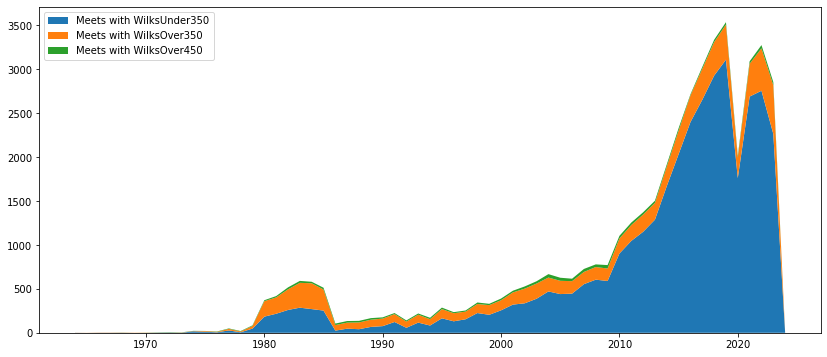

In [23]:
fig, ax = plt.subplots(figsize=(14,6))

labels = ['Meets with WilksUnder350', 'Meets with WilksOver350', 'Meets with WilksOver450']

ax.stackplot(meanMeetWilks.groupby('Year')['WilksOver450'].sum().reset_index()['Year'],             
             meanMeetWilks.groupby('Year')['WilksUnder350'].sum(),
             meanMeetWilks.groupby('Year')['WilksOver350'].sum(),
             meanMeetWilks.groupby('Year')['WilksOver450'].sum(), labels=labels)
ax.legend(loc='upper left')
plt.show()

In [24]:
# growth rates of the meets by Wilks score

In [25]:
growth10y = meanMeetWilks.set_index('Date').resample('10Y').sum().reset_index()[['Date', 'WilksOver450', 'WilksOver350', 'WilksUnder350']]
growth10y

/tmp/ipykernel_1485191/3179463452.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  growth10y = meanMeetWilks.set_index('Date').resample('10Y').sum().reset_index()[['Date', 'WilksOver450', 'WilksOver350', 'WilksUnder350']]


Date  WilksOver450  WilksOver350  WilksUnder350
0 1964-12-31             0             1              1
1 1974-12-31            11            18             26
2 1984-12-31           109          1244           1316
3 1994-12-31           160           940            888
4 2004-12-31           202          1249           2652
5 2014-12-31           299          1680           8693
6 2024-12-31           238          3347          22598

In [26]:
growth10y[['WilksOver450', 'WilksOver350', 'WilksUnder350']].pct_change()*100

WilksOver450  WilksOver350  WilksUnder350
0           NaN           NaN            NaN
1           inf   1700.000000    2500.000000
2    890.909091   6811.111111    4961.538462
3     46.788991    -24.437299     -32.522796
4     26.250000     32.872340     198.648649
5     48.019802     34.507606     227.790347
6    -20.401338     99.226190     159.956287

In [27]:
# where is growth located? where is powerlifting most popular?

In [28]:
meets.groupby(['MeetCountry'])['Date'].nunique().sort_values(ascending=False)[0:25]

MeetCountry
USA            4459
Russia         2086
Norway         2067
Australia      1387
Canada         1124
England         874
Finland         784
Ukraine         717
Germany         689
Czechia         563
New Zealand     507
Iceland         482
UK              466
Sweden          399
France          362
Denmark         322
Japan           248
Netherlands     238
Belgium         227
Italy           223
Ireland         200
Scotland        185
Argentina       143
Spain           130
Poland          123
Name: Date, dtype: int64

In [29]:
meetsByCountry = meets.groupby(['MeetCountry'])['Date'].nunique().reset_index().rename(columns={'Date':'NumberOfMeets'})
meetsByCountry['MeetCountry'] = meetsByCountry['MeetCountry'].replace({'UK':'United Kingdom', 'USA':'United States'})

In [30]:
# city data used from https://simplemaps.com/data/world-cities
worldCities = pd.read_csv('/home/jan-willem/Documents/simplemaps_worldcities_basicv1.76/worldcities.csv')

In [31]:
meetsByCountry = meetsByCountry.merge(worldCities[['country','iso3']], left_on='MeetCountry', right_on='country', how='left')[['MeetCountry','NumberOfMeets','iso3']]
meetsByCountry.dropna(inplace=True)
meetsByCountry.drop_duplicates(keep='first', inplace=True)
meetsByCountry

MeetCountry  NumberOfMeets iso3
0         Algeria              3  DZA
170     Argentina            143  ARG
637         Aruba              3  ABW
639     Australia           1387  AUS
908       Austria             85  AUT
...           ...            ...  ...
38901     Ukraine            717  UKR
39320     Uruguay              8  URY
39375  Uzbekistan              5  UZB
39561   Venezuela              2  VEN
39692     Vietnam              9  VNM

[107 rows x 3 columns]

In [32]:
# basic choropleth map
fig = px.choropleth(meetsByCountry, locations='iso3', color='NumberOfMeets', hover_name='MeetCountry',
                  projection='natural earth', title='Number of Powerlifting Meets by Country')
fig.show()

In [33]:
# detailed world map by city 
meetsByTown = meets.groupby(['MeetTown', 'MeetCountry'])['Date'].nunique().reset_index()
meetsByTown.rename(columns={'Date':'MeetCount'}, inplace=True)
meetsByTown['MeetCountry'].replace({'USA':'United States', 'UK':'United Kingdom'}, inplace=True)
meetsByTown

MeetTown    MeetCountry  MeetCount
0     ABILENE COOPER HIGH SCHOOL  United States          1
1              AC Jones Beeville  United States          1
2            ACADEMY HIGH SCHOOL  United States          1
3                AK Frem Randers        Denmark          2
4                    AK Nordland        Denmark          1
...                          ...            ...        ...
7341                      Žagarė      Lithuania          2
7342           Žd'Ár Nad Sázavou        Czechia          1
7343                     Žd'Árná        Czechia          1
7344                 Želechovice        Czechia          1
7345                   Хабаровск         Russia          1

[7346 rows x 3 columns]

In [34]:
meetsByTown = meetsByTown.merge(worldCities, left_on=['MeetTown', 'MeetCountry'], right_on=['city', 'country'])[['MeetTown','MeetCount', 'city_ascii', 'lat', 'lng', 'country', 'iso3']]
meetsByTown

MeetTown  MeetCount   city_ascii      lat      lng    country iso3
0          Aachen          3       Aachen  50.7756   6.0836    Germany  DEU
1         Aalborg         13      Aalborg  57.0500   9.9167    Denmark  DNK
2           Aalst          4        Aalst  50.9383   4.0392    Belgium  BEL
3          Aarhus         18       Aarhus  56.1572  10.2107    Denmark  DNK
4        Aarschot          1     Aarschot  50.9842   4.8333    Belgium  BEL
...           ...        ...          ...      ...      ...        ...  ...
3793        Łuków          1        Lukow  51.9272  22.3833     Poland  POL
3794         Łódź          1         Lodz  51.7769  19.4547     Poland  POL
3795     Šiauliai          2     Siauliai  55.9333  23.3167  Lithuania  LTU
3796      Šibenik          1      Sibenik  43.7350  15.8906    Croatia  HRV
3797  Škofja Loka          1  Skofja Loka  46.1672  14.3030   Slovenia  SVN

[3798 rows x 7 columns]

In [35]:
meetsByTown

MeetTown  MeetCount   city_ascii      lat      lng    country iso3
0          Aachen          3       Aachen  50.7756   6.0836    Germany  DEU
1         Aalborg         13      Aalborg  57.0500   9.9167    Denmark  DNK
2           Aalst          4        Aalst  50.9383   4.0392    Belgium  BEL
3          Aarhus         18       Aarhus  56.1572  10.2107    Denmark  DNK
4        Aarschot          1     Aarschot  50.9842   4.8333    Belgium  BEL
...           ...        ...          ...      ...      ...        ...  ...
3793        Łuków          1        Lukow  51.9272  22.3833     Poland  POL
3794         Łódź          1         Lodz  51.7769  19.4547     Poland  POL
3795     Šiauliai          2     Siauliai  55.9333  23.3167  Lithuania  LTU
3796      Šibenik          1      Sibenik  43.7350  15.8906    Croatia  HRV
3797  Škofja Loka          1  Skofja Loka  46.1672  14.3030   Slovenia  SVN

[3798 rows x 7 columns]

In [36]:
meetsByTown['Text'] = meetsByTown['MeetTown'] + ', meetCount: ' + meetsByTown['MeetCount'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        lon = meetsByTown['lng'],
        lat = meetsByTown['lat'],
        text = meetsByTown['Text'],
        mode = 'markers',
        marker_color = meetsByTown['MeetCount'],
        marker=dict(size=meetsByTown['MeetCount']/2, opacity=0.25)
        ))

fig.update_layout(
        title = 'Location of powerlifting meets worldwide',
        geo_scope='world',
    )
fig.show()

In [37]:
# now for the competitors themselves. how did the features of lifters change over the years?

In [38]:
# sex ratio of sport over years


In [39]:
numWomen = pd.concat([meets[['Name','Sex','Year']], pd.get_dummies(meets[['Sex']])], axis=1).groupby('Year')['Sex_F'].sum()
numMen = pd.concat([meets[['Name','Sex','Year']], pd.get_dummies(meets[['Sex']])], axis=1).groupby('Year')['Sex_M'].sum()
numInter = pd.concat([meets[['Name','Sex','Year']], pd.get_dummies(meets[['Sex']])], axis=1).groupby('Year')['Sex_Mx'].sum()

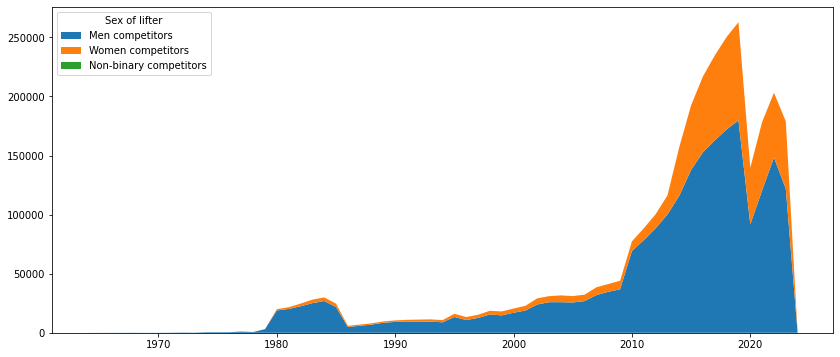

In [40]:
fig, ax = plt.subplots(figsize=(14,6))

labels = ['Men competitors', 'Women competitors', 'Non-binary competitors']

ax.stackplot(numMen.index,             
             numMen,
             numWomen,
             numInter, labels=labels)
ax.legend(title='Sex of lifter', loc='upper left')
plt.show()

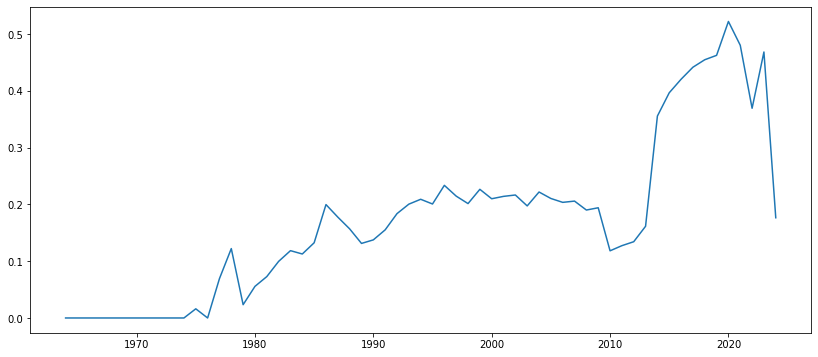

In [41]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(numMen.index, numWomen/numMen)

In [42]:
# do people compete more or less as powerlifting grows?

In [43]:
meetsPerYear = meets.groupby(['Name', 'Year'])['MeetName'].nunique().sort_values(ascending=False).reset_index().rename(columns={'MeetName':'MeetCount'})
meetsPerYear

Name  Year  MeetCount
0        Aleksandr Ivanov  2019         26
1           Anthony Perez  2017         25
2        Aleksandr Ivanov  2018         25
3        Aleksandr Ivanov  2017         21
4                R. Smith  1980         20
...                   ...   ...        ...
1619113     J. Swiniarski  1981          1
1619114          J. Swift  2001          1
1619115       J. Sweitzer  1982          1
1619116         J. Sweger  2002          1
1619117             𠮷田 瑞規  2017          1

[1619118 rows x 3 columns]

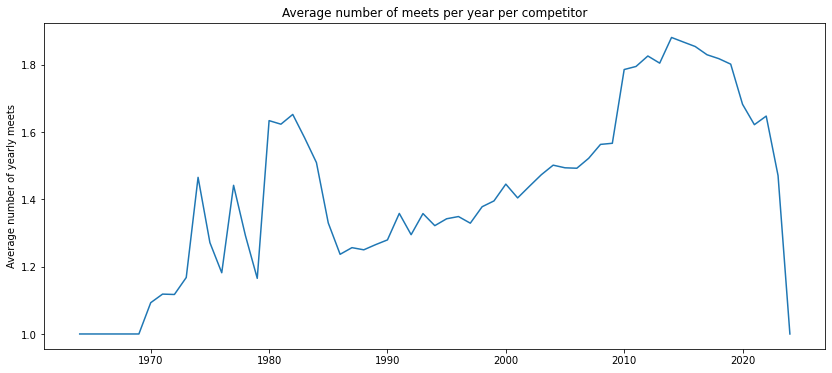

In [44]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(meetsPerYear.groupby('Year')['MeetCount'].mean().index, meetsPerYear.groupby('Year')['MeetCount'].mean())
ax.set_title('Average number of meets per year per competitor')
ax.set_ylabel('Average number of yearly meets')
plt.show()

In [45]:
# equipment use over the years. 

In [46]:
equipment = meets.groupby(['Year', 'Equipment'])['MeetName'].count().reset_index().rename(columns={'MeetName':'Count'})
equipmentCount = equipment[equipment['Equipment'] == 'Raw']
equipmentCount.rename(columns={'Count':'CountRaw'}, inplace=True)
equipmentCount = equipmentCount.merge(equipment[equipment['Equipment'] == 'Wraps'][['Year', 'Count']], left_on='Year', right_on='Year', how='left')
equipmentCount.rename(columns={'Count':'CountWraps'}, inplace=True)
equipmentCount = equipmentCount.merge(equipment[equipment['Equipment'] == 'Single-ply'][['Year', 'Count']], left_on='Year', right_on='Year', how='left')
equipmentCount.rename(columns={'Count':'CountSingle-ply'}, inplace=True)
equipmentCount = equipmentCount.merge(equipment[equipment['Equipment'] == 'Multi-ply'][['Year', 'Count']], left_on='Year', right_on='Year', how='left')
equipmentCount.rename(columns={'Count':'CountMulti-ply'}, inplace=True)
equipmentCount = equipmentCount.merge(equipment[equipment['Equipment'] == 'Unlimited'][['Year', 'Count']], left_on='Year', right_on='Year', how='left')
equipmentCount.rename(columns={'Count':'CountUnlimited'}, inplace=True)
equipmentCount = equipmentCount.merge(equipment[equipment['Equipment'] == 'Straps'][['Year', 'Count']], left_on='Year', right_on='Year', how='left')
equipmentCount.rename(columns={'Count':'CountStraps'}, inplace=True)
equipmentCount.fillna(0)

/tmp/ipykernel_1485191/2963512007.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Year Equipment  CountRaw  CountWraps  CountSingle-ply  CountMulti-ply  \
0   1964       Raw        18        21.0              0.0             0.0   
1   1965       Raw         3        42.0              0.0             0.0   
2   1966       Raw        10        61.0              0.0             0.0   
3   1967       Raw         2        92.0              0.0             0.0   
4   1968       Raw        30        78.0              0.0             0.0   
5   1969       Raw         2        55.0              0.0             0.0   
6   1970       Raw         5        89.0              0.0             0.0   
7   1971       Raw         4       147.0              0.0             0.0   
8   1972       Raw        50       207.0              0.0             0.0   
9   1973       Raw        62       105.0              0.0             0.0   
10  1974       Raw        11       480.0              0.0             0.0   
11  1975       Raw         2       502.0              0.0             0.0   
12  1976       Raw        46       506.0              0.0             0.0   
13  1977       Raw         7       644.0            429.0             0.0   
14  1978       Raw         2         2.0            694.0             0.0   
15  1979       Raw       633         1.0           2515.0             0.0   
16  1980       Raw      2001        42.0          17964.0             0.0   
17  1981       Raw      2899         0.0          18756.0             0.0   
18  1982       Raw      4105         0.0          20566.0             0.0   
19  1983       Raw      4000        22.0          24041.0             0.0   
20  1984       Raw      5413         0.0          24541.0             0.0   
21  1985       Raw      3501         0.0          21153.0             0.0   
22  1986       Raw       106         0.0           5830.0             0.0   
23  1988       Raw        71         3.0           7949.0             0.0   
24  1989       Raw        32        24.0           9560.0             1.0   
25  1990       Raw       144         0.0          10344.0             0.0   
26  1991       Raw       255         1.0          10732.0             0.0   
27  1992       Raw       351         3.0          10726.0            98.0   
28  1993       Raw        82         1.0          10857.0           428.0   
29  1994       Raw       279         1.0           9150.0          1323.0   
30  1995       Raw        87         2.0          14625.0          1367.0   
31  1996       Raw       484         0.0          11421.0          1416.0   
32  1997       Raw      1053        68.0          12464.0          1692.0   
33  1998       Raw      1835       123.0          13753.0          2935.0   
34  1999       Raw      1467        78.0          14153.0          2385.0   
35  2000       Raw      2222       126.0          14986.0          3212.0   
36  2001       Raw      2007       187.0          17415.0          3224.0   
37  2002       Raw      3665       142.0          21502.0          3853.0   
38  2003       Raw      3184        74.0          23876.0          3877.0   
39  2004       Raw      3065       129.0          23645.0          4812.0   
40  2005       Raw      2870       100.0          23175.0          4929.0   
41  2006       Raw      3097       136.0          22743.0          6307.0   
42  2007       Raw      5669       370.0          24500.0          7974.0   
43  2008       Raw      6920       871.0          25694.0          7797.0   
44  2009       Raw     10514      1688.0          24761.0          7041.0   
45  2010       Raw     14416      2163.0          53995.0          6815.0   
46  2011       Raw     23119      3256.0          55976.0          6065.0   
47  2012       Raw     33301      4546.0          56073.0          6420.0   
48  2013       Raw     46744      7648.0          56046.0          5840.0   
49  2014       Raw     67437     11836.0          72863.0          5043.0   
50  2015       Raw     91001     17071.0          79775.0          4698.0   


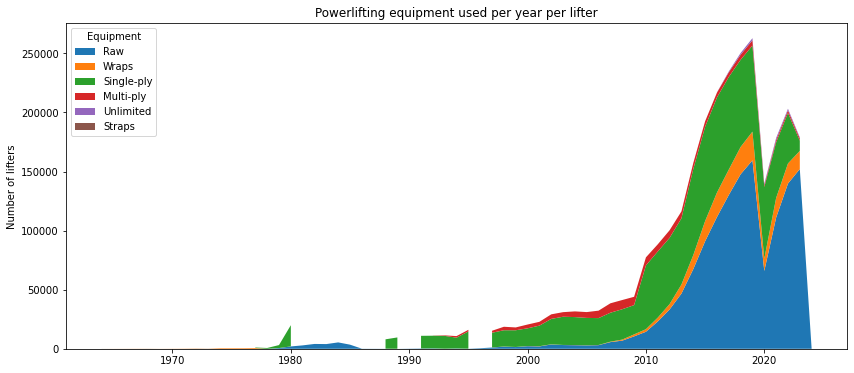

In [47]:
fig, ax = plt.subplots(figsize=(14,6))
labels = ['Raw', 'Wraps', 'Single-ply', 'Multi-ply', 'Unlimited', 'Straps']

ax.stackplot(equipmentCount['Year'],             
             equipmentCount['CountRaw'],
             equipmentCount['CountWraps'],
             equipmentCount['CountSingle-ply'],
             equipmentCount['CountMulti-ply'],
             equipmentCount['CountUnlimited'],
             equipmentCount['CountStraps'],
              labels=labels)
ax.legend(title='Equipment', loc='upper left')
ax.set_ylabel('Number of lifters')
ax.set_title('Powerlifting equipment used per year per lifter')
plt.show()

In [48]:
# age of average competitor

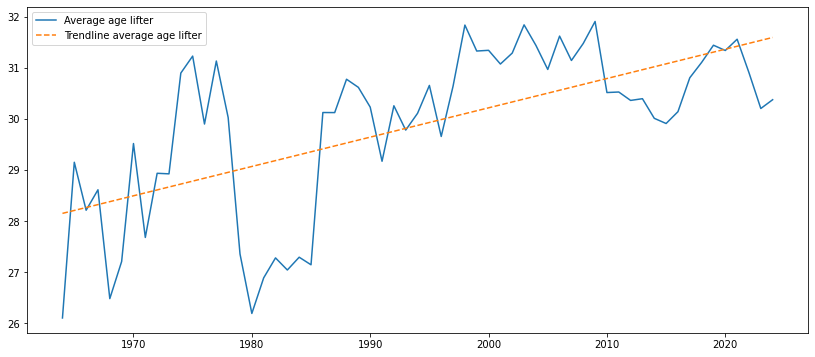

In [49]:
averageAgeLifter = meets.groupby('Year')['Age'].mean().reset_index()

z = np.polyfit(averageAgeLifter['Year'], averageAgeLifter['Age'], 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(averageAgeLifter['Year'], averageAgeLifter['Age'], label='Average age lifter')
ax.plot(averageAgeLifter['Year'], p(averageAgeLifter['Year']), linestyle='dashed', label='Trendline average age lifter')
ax.legend()
ax.set_ylabel('')
plt.show()

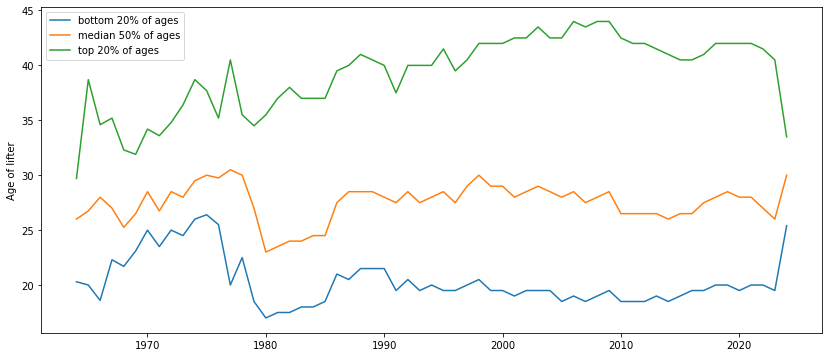

In [50]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(
    (meets.groupby('Year')['Age'].quantile([0.2,0.5,0.8])
.reset_index()[meets.groupby('Year')['Age'].quantile([0.2,0.5,0.8]).reset_index()['level_1'] == 0.2])['Year'],
(meets.groupby('Year')['Age'].quantile([0.2,0.5,0.8])
.reset_index()[meets.groupby('Year')['Age'].quantile([0.2,0.5,0.8]).reset_index()['level_1'] == 0.2])['Age'], label='bottom 20% of ages') 
ax.plot(
    (meets.groupby('Year')['Age'].quantile([0.2,0.5,0.8])
.reset_index()[meets.groupby('Year')['Age'].quantile([0.2,0.5,0.8]).reset_index()['level_1'] == 0.5])['Year'],
    (meets.groupby('Year')['Age'].quantile([0.2,0.5,0.8])
.reset_index()[meets.groupby('Year')['Age'].quantile([0.2,0.5,0.8]).reset_index()['level_1'] == 0.5])['Age'], label='median 50% of ages') 
ax.plot(
(meets.groupby('Year')['Age'].quantile([0.2,0.5,0.8])
.reset_index()[meets.groupby('Year')['Age'].quantile([0.2,0.5,0.8]).reset_index()['level_1'] == 0.8])['Year'],
(meets.groupby('Year')['Age'].quantile([0.2,0.5,0.8])
.reset_index()[meets.groupby('Year')['Age'].quantile([0.2,0.5,0.8]).reset_index()['level_1'] == 0.8])['Age'], label='top 20% of ages')
ax.legend()
ax.set_ylabel('Age of lifter')
plt.show()

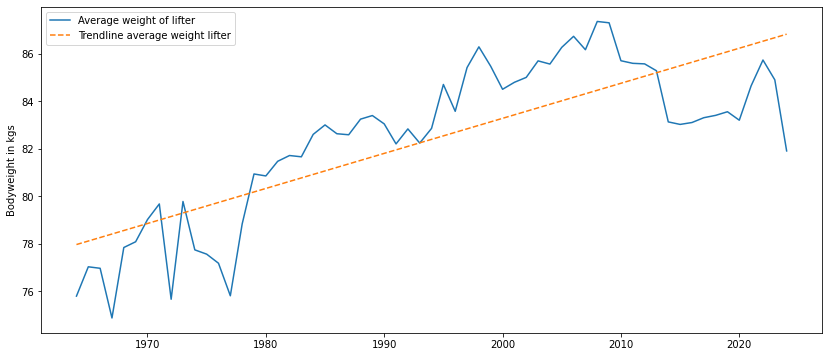

In [51]:
# weight of average competitor
averageWeightLifter = meets.groupby('Year')['BodyweightKg'].mean().reset_index()

z = np.polyfit(averageWeightLifter['Year'], averageWeightLifter['BodyweightKg'], 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(averageWeightLifter['Year'], averageWeightLifter['BodyweightKg'], label='Average weight of lifter')
ax.plot(averageWeightLifter['Year'], p(averageWeightLifter['Year']), linestyle='dashed', label='Trendline average weight lifter')
ax.set_ylabel('Bodyweight in kgs')
ax.legend()
plt.show()

In [52]:
# can we divide lifters into different types of lifters via a cluster analysis?

In [53]:
numericData = meets[['Age', 'BodyweightKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Best3DeadliftKg', 'TotalKg', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift']].dropna()
numericData = numericData[numericData != 'G']
numericData.head(5)

Age  BodyweightKg  Squat1Kg  Squat2Kg  Squat3Kg  Best3SquatKg  Bench1Kg  \
0  33.0         58.30      75.0      80.0     -90.0          80.0      50.0   
1  43.0         73.10      95.0     100.0     105.0         105.0      62.5   
2  15.5         67.40      85.0      90.0     100.0         100.0      55.0   
3  35.0         66.65     125.0     132.0     137.5         137.5     115.0   
4  26.5         72.45      80.0      85.0      90.0          90.0      40.0   

   Bench2Kg  Bench3Kg  Best3BenchKg  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  \
0      55.0      60.0          60.0         95.0        105.0        107.5   
1      67.5     -72.5          67.5        100.0        110.0       -120.0   
2      62.5     -65.0          62.5         90.0        100.0        105.0   
3     122.5    -127.5         122.5        150.0        165.0        170.0   
4      50.0     -60.0          50.0        112.5        120.0        125.0   

   Best3DeadliftKg  TotalKg    Dots   Wilks  Glossbrenner  Goodlift  
0            107.5    247.5  279.44  282.18        249.42     57.10  
1            110.0    282.5  278.95  272.99        240.35     56.76  
2            105.0    267.5  206.40  206.49        200.45     41.24  
3            170.0    430.0  334.49  334.94        325.32     66.68  
4            125.0    265.0  194.46  193.55        187.29     39.34

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numericDataScaled = scaler.fit_transform(numericData)
pd.DataFrame(numericDataScaled)

0         1         2         3         4         5         6   \
0       0.357952 -1.153991 -0.380820 -0.197132 -0.758200 -1.475588 -0.489837   
1       1.209233 -0.465502 -0.220722 -0.063164  0.292395 -1.095837 -0.323055   
2      -1.131789 -0.730663 -0.300771 -0.130148  0.265457 -1.171787 -0.423124   
3       0.528208 -0.765553  0.019425  0.151183  0.467494 -0.602159  0.377430   
4      -0.195380 -0.495739 -0.340796 -0.163640  0.211580 -1.323688 -0.623263   
...          ...       ...       ...       ...       ...       ...       ...   
679053  0.272824  0.553277  1.020036  0.975081  1.127483  1.258624  0.844420   
679054  1.379489  1.218506  0.899963 -2.357352  1.033199  0.992798  1.177985   
679055 -0.110252  1.400863 -2.882350  0.857860 -1.606757  0.916848  1.278054   
679056  0.741028  1.287820  0.699841  0.757384  0.952384  0.764947  1.378123   
679057  0.911284  1.926999  0.699841  0.740639 -1.499004  0.651022  0.710995   

              7         8         9         10        11        12        13  \
0      -0.111115  0.508283 -1.114375 -0.715066 -0.266361  0.372845 -1.499592   
1       0.011667 -0.544567 -0.957060 -0.663384 -0.231534 -0.714363 -1.458070   
2      -0.037446 -0.484972 -1.061936 -0.766748 -0.301187  0.360898 -1.541114   
3       0.551912 -0.981600  0.196583 -0.146566  0.151561  0.671529 -0.461541   
4      -0.160228 -0.445242 -1.324128 -0.534180 -0.161880  0.456477 -1.208938   
...          ...       ...       ...       ...       ...       ...       ...   
679053 -2.222979  1.302887  0.983158  0.421935  0.552069  0.946318  0.493465   
679054  1.141269  1.521403  1.559979  0.370253  0.465002  0.886581  0.285855   
679055  1.214938  1.580998  1.717294  0.215208  0.395348 -1.144468  0.036723   
679056 -2.615883  1.620728  1.822171  0.215208  0.325695 -1.072783 -0.129365   
679057 -2.100196  1.223426  0.773405 -0.198247 -2.077353 -0.881626 -0.876761   

              14        15        16        17        18  
0      -1.428181 -1.059848 -1.002799 -1.146716 -0.972234  
1      -1.220388 -1.066149 -1.121259 -1.265270 -0.995844  
2      -1.309442 -1.999153 -1.978456 -1.786801 -2.073551  
3      -0.344688 -0.351897 -0.322713 -0.154630 -0.307000  
4      -1.324284 -2.152703 -2.145255 -1.958815 -2.205487  
...          ...       ...       ...       ...       ...  
679053  0.946598  2.600278  2.424183  1.784839  1.826888  
679054  0.931755  2.198785  2.128998  1.437413  1.531769  
679055  0.857543  1.988264  1.950082  1.273895  1.351919  
679056  0.768489  1.876766  1.821954  1.169197  1.235260  
679057  0.159952  0.607985  0.633609  0.115416  0.079086  

[679058 rows x 19 columns]

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
 
NumericDataPCA = pd.DataFrame(pca.fit_transform(pd.DataFrame(numericDataScaled).dropna()))
NumericDataPCA

0         1
0      -3.744617  0.279479
1      -3.297371 -0.441489
2      -4.621109 -0.913615
3      -0.810070 -0.309872
4      -4.813179 -1.436261
...          ...       ...
679053  4.388526  1.173179
679054  4.152453  0.054180
679055  3.622100  0.775104
679056  3.548723  0.521090
679057  0.886506  0.184310

[679058 rows x 2 columns]

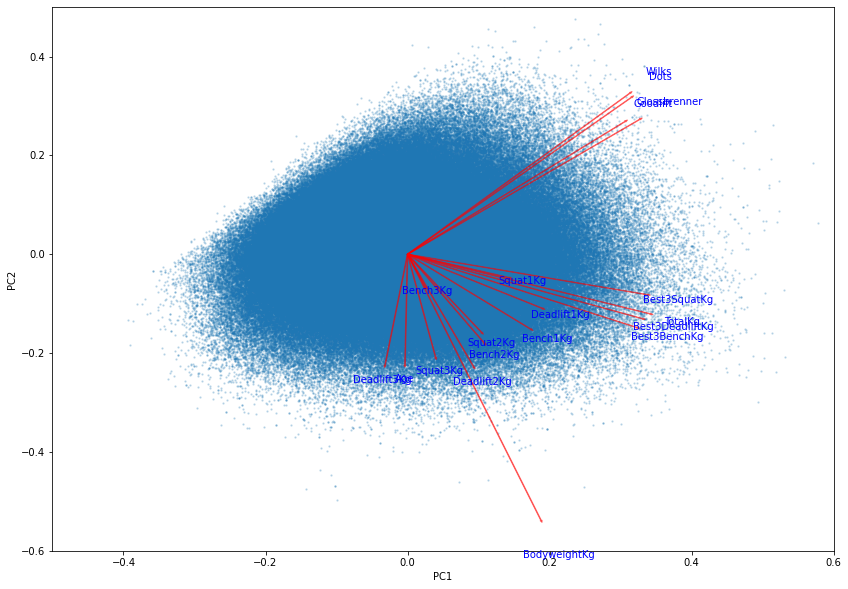

In [56]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, alpha=0.2, s=2)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.13, coeff[i,1] * 1.13, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.13, coeff[i,1] * 1.13, labels[i], color = 'b', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

#Call the function. Use only the 2 PCs.
plt.figure(figsize=(14,10))
myplot(NumericDataPCA.values ,np.transpose(pca.components_[0:2, :]), numericData.columns)
plt.xlim(-0.5,0.6)
plt.ylim(-0.6,0.5)
plt.show()

In [57]:
from sklearn.cluster import KMeans
kmeans4 = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(numericData.dropna())

In [58]:
kmeans4.labels_

array([0, 3, 0, ..., 2, 2, 3], dtype=int32)

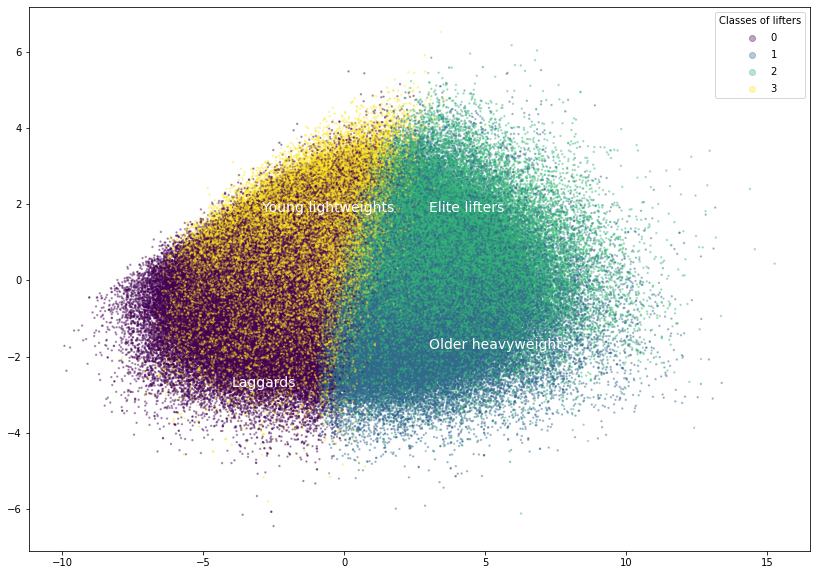

In [59]:
mylabels = ['low performers', 'heavy weights', 'elite performers', 'young lightweights']
plt.figure(figsize=(14,10))
scatter = plt.scatter(NumericDataPCA[0], NumericDataPCA[1], c=kmeans4.labels_, s=2, alpha=0.35)
plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes of lifters")
plt.annotate('Elite lifters', xy =(3.3, 1), 
                xytext =(3, 1.8), color='white', fontsize=14)
plt.annotate('Young lightweights', xy =(-2.9, 1), 
                xytext =(-2.9, 1.8), color='white', fontsize=14)
plt.annotate('Laggards', xy =(-3, -3), 
                xytext =(-4, -2.8), color='white', fontsize=14)
plt.annotate('Older heavyweights', xy =(3.3, -2), 
                xytext =(3, -1.8), color='white', fontsize=14)
plt.show()

In [60]:
# progression of lifts over 3 attempts in the 3 lifts (deadlift, squat and benchpress)

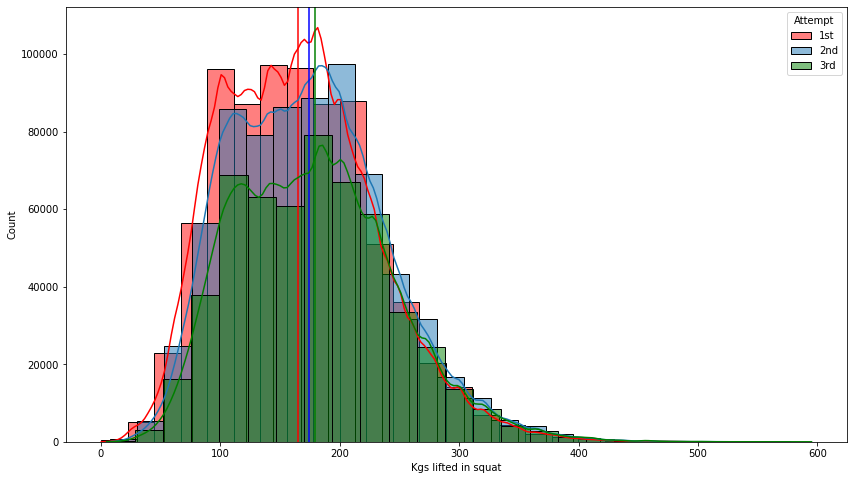

In [61]:
plt.figure(figsize=(14,8))
sns.histplot(meets[['Squat1Kg']][meets[['Squat1Kg']] > 0].dropna(), bins=25, alpha=0.5, kde=True, palette=['r'], label='1st')
plt.axvline(x=(meets[['Squat1Kg']][meets[['Squat1Kg']] > 0].dropna()).mean()[0], c='red')

sns.histplot(meets[['Squat2Kg']][meets[['Squat2Kg']] > 0].dropna(), bins=25, alpha=0.5, kde=True, label='2nd')
plt.axvline(x=(meets[['Squat2Kg']][meets[['Squat2Kg']] > 0].dropna()).mean()[0], c='blue')

sns.histplot(meets[['Squat3Kg']][meets[['Squat3Kg']] > 0].dropna(), bins=25, alpha=0.5, kde=True, palette=['g'], label='3rd')
plt.axvline(x=(meets[['Squat3Kg']][meets[['Squat3Kg']] > 0].dropna()).mean()[0], c='green')

plt.legend(title='Attempt')
plt.xlabel('Kgs lifted in squat')
plt.show()

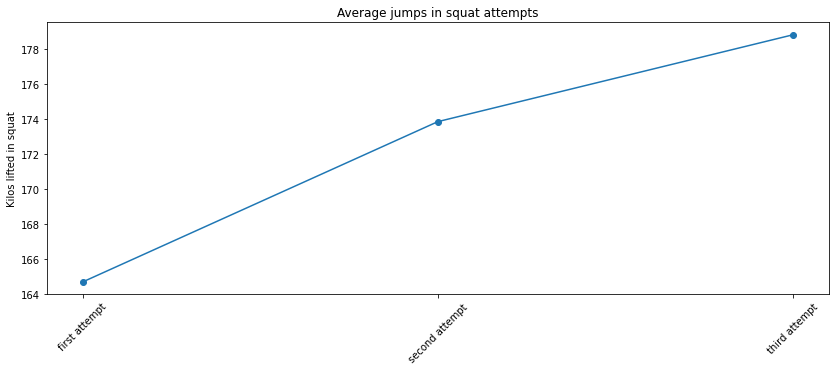

Ttest_indResult(statistic=array([-86.08885431]), pvalue=array([0.]))
Ttest_indResult(statistic=array([-41.78006409]), pvalue=array([0.]))


In [62]:
avgFirstSquat = (meets[['Squat1Kg']][meets[['Squat1Kg']] > 0].dropna()).mean()[0]
avgSecondSquat = (meets[['Squat2Kg']][meets[['Squat2Kg']] > 0].dropna()).mean()[0]
avgThirdSquat = (meets[['Squat3Kg']][meets[['Squat3Kg']] > 0].dropna()).mean()[0]

ttestSquat1 = stats.ttest_ind(meets[['Squat1Kg']][meets[['Squat1Kg']] > 0].dropna(), 
                meets[['Squat2Kg']][meets[['Squat2Kg']] > 0].dropna(),
                equal_var=False)

ttestSquat2 = stats.ttest_ind(meets[['Squat2Kg']][meets[['Squat2Kg']] > 0].dropna(), 
                meets[['Squat3Kg']][meets[['Squat3Kg']] > 0].dropna(),
                equal_var=False)

plt.figure(figsize=(14,5))
plt.plot([avgFirstSquat,avgSecondSquat,avgThirdSquat], marker='o')
plt.xticks([0,1,2], labels=['first attempt', 'second attempt', 'third attempt'], rotation=45)
plt.title('Average jumps in squat attempts')
plt.ylabel('Kilos lifted in squat')
plt.show()

print(ttestSquat1)
print(ttestSquat2)

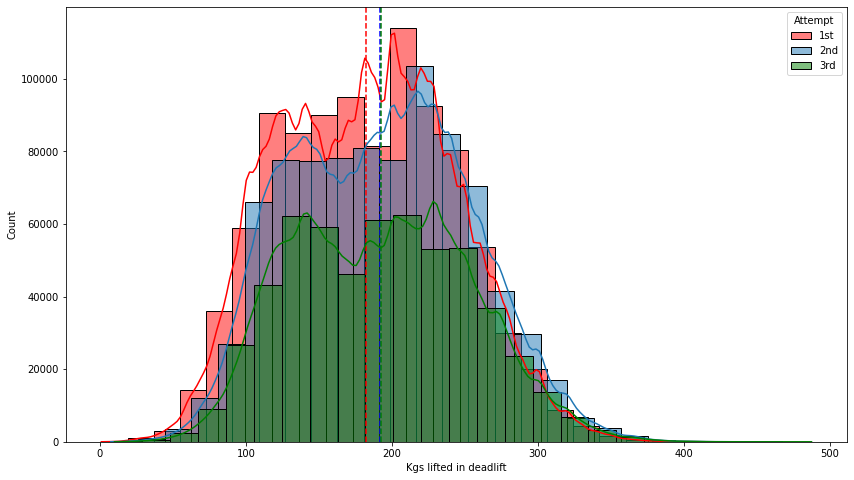

In [63]:
plt.figure(figsize=(14,8))
sns.histplot(meets[['Deadlift1Kg']][meets[['Deadlift1Kg']] > 0].dropna(), bins=25, alpha=0.5, kde=True, palette=['r'], label='1st')
plt.axvline(x=(meets[['Deadlift1Kg']][meets[['Deadlift1Kg']] > 0].dropna()).mean()[0], c='red', linestyle='dashed')

sns.histplot(meets[['Deadlift2Kg']][meets[['Deadlift2Kg']] > 0].dropna(), bins=25, alpha=0.5, kde=True, label='2nd')
plt.axvline(x=(meets[['Deadlift2Kg']][meets[['Deadlift2Kg']] > 0].dropna()).mean()[0], c='blue', linestyle='dashed')

sns.histplot(meets[['Deadlift3Kg']][meets[['Deadlift3Kg']] > 0].dropna(), bins=25, alpha=0.5, kde=True, palette=['g'], label='3rd')
plt.axvline(x=(meets[['Deadlift3Kg']][meets[['Deadlift3Kg']] > 0].dropna()).mean()[0], linestyle='dashed', c='green')

plt.legend(title='Attempt')
plt.xlabel('Kgs lifted in deadlift')
plt.show()

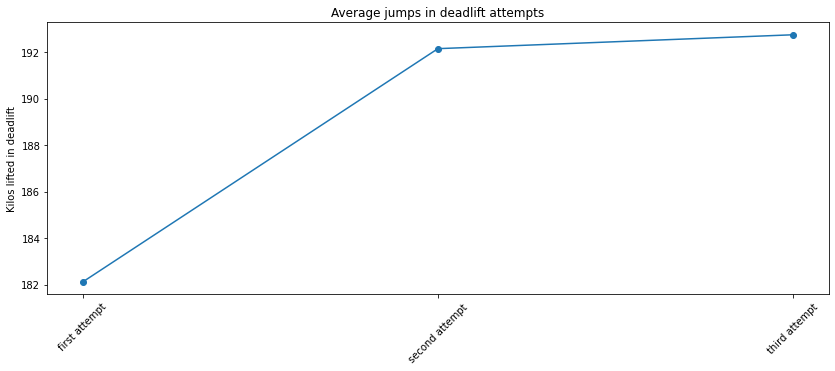

Ttest_indResult(statistic=array([-111.77864859]), pvalue=array([0.]))
Ttest_indResult(statistic=array([-5.71920097]), pvalue=array([1.07051187e-08]))


In [64]:
avgFirstDeadlift = (meets[['Deadlift1Kg']][meets[['Deadlift1Kg']] > 0].dropna()).mean()[0]
avgSecondDeadlift = (meets[['Deadlift2Kg']][meets[['Deadlift2Kg']] > 0].dropna()).mean()[0]
avgThirdDeadlift = (meets[['Deadlift3Kg']][meets[['Deadlift3Kg']] > 0].dropna()).mean()[0]

ttestDeadlift1 = stats.ttest_ind(meets[['Deadlift1Kg']][meets[['Deadlift1Kg']] > 0].dropna(), 
                meets[['Deadlift2Kg']][meets[['Deadlift2Kg']] > 0].dropna(),
                equal_var=False)

ttestDeadlift2 = stats.ttest_ind(meets[['Deadlift2Kg']][meets[['Deadlift2Kg']] > 0].dropna(), 
                meets[['Deadlift3Kg']][meets[['Deadlift3Kg']] > 0].dropna(),
                equal_var=False)

plt.figure(figsize=(14,5))
plt.plot([avgFirstDeadlift,avgSecondDeadlift,avgThirdDeadlift], marker='o')
plt.xticks([0,1,2], labels=['first attempt', 'second attempt', 'third attempt'], rotation=45)
plt.title('Average jumps in deadlift attempts')
plt.ylabel('Kilos lifted in deadlift')
plt.show()

print(ttestDeadlift1)
print(ttestDeadlift2)

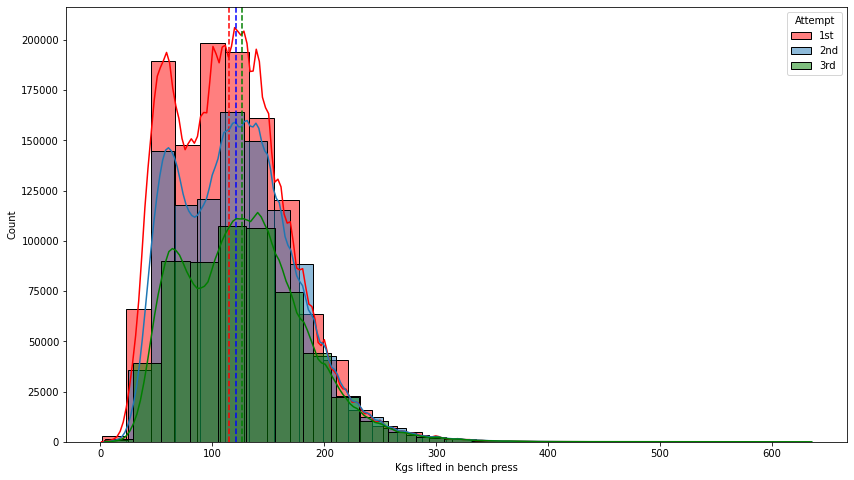

In [65]:
plt.figure(figsize=(14,8))
sns.histplot(meets[['Bench1Kg']][meets[['Bench1Kg']] > 0].dropna(), bins=25, alpha=0.5, kde=True, palette=['r'], label='1st')
plt.axvline(x=(meets[['Bench1Kg']][meets[['Bench1Kg']] > 0].dropna()).mean()[0], c='red', linestyle='dashed')

sns.histplot(meets[['Bench2Kg']][meets[['Bench2Kg']] > 0].dropna(), bins=25, alpha=0.5, kde=True, label='2nd')
plt.axvline(x=(meets[['Bench2Kg']][meets[['Bench2Kg']] > 0].dropna()).mean()[0], c='blue', linestyle='dashed')

sns.histplot(meets[['Bench3Kg']][meets[['Bench3Kg']] > 0].dropna(), bins=25, alpha=0.5, kde=True, palette=['g'], label='3rd')
plt.axvline(x=(meets[['Bench3Kg']][meets[['Bench3Kg']] > 0].dropna()).mean()[0], linestyle='dashed', c='green')

plt.legend(title='Attempt')
plt.xlabel('Kgs lifted in bench press')
plt.show()

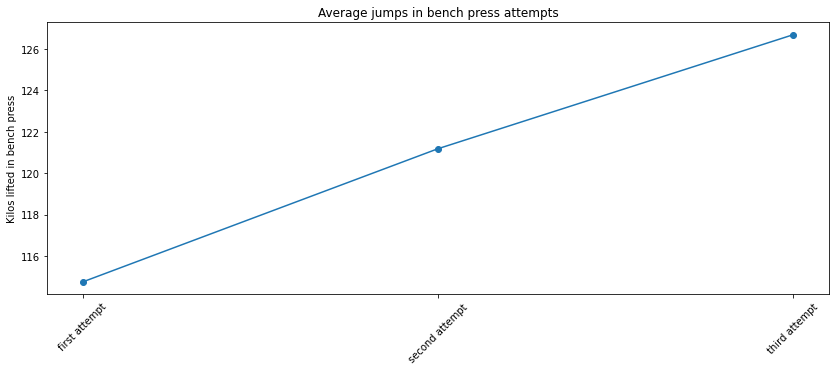

Ttest_indResult(statistic=array([-111.77864859]), pvalue=array([0.]))
Ttest_indResult(statistic=array([-5.71920097]), pvalue=array([1.07051187e-08]))


In [66]:
avgFirstBench = (meets[['Bench1Kg']][meets[['Bench1Kg']] > 0].dropna()).mean()[0]
avgSecondBench = (meets[['Bench2Kg']][meets[['Bench2Kg']] > 0].dropna()).mean()[0]
avgThirdBench= (meets[['Bench3Kg']][meets[['Bench3Kg']] > 0].dropna()).mean()[0]

ttestBench1 = stats.ttest_ind(meets[['Bench1Kg']][meets[['Bench1Kg']] > 0].dropna(), 
                meets[['Bench2Kg']][meets[['Bench2Kg']] > 0].dropna(),
                equal_var=False)

ttestBench2 = stats.ttest_ind(meets[['Bench2Kg']][meets[['Bench2Kg']] > 0].dropna(), 
                meets[['Bench3Kg']][meets[['Bench3Kg']] > 0].dropna(),
                equal_var=False)

plt.figure(figsize=(14,5))
plt.plot([avgFirstBench,avgSecondBench,avgThirdBench], marker='o')
plt.xticks([0,1,2], labels=['first attempt', 'second attempt', 'third attempt'], rotation=45)
plt.title('Average jumps in bench press attempts')
plt.ylabel('Kilos lifted in bench press')
plt.show()

print(ttestDeadlift1)
print(ttestDeadlift2)

In [67]:
# missed lifts (sankey visual)

In [68]:
passPass1 = ((meets['Squat1Kg'] > 0) & (meets['Squat2Kg'] > 0)).astype(int).sum()
failPass1 = ((meets['Squat1Kg'] < 0) & (meets['Squat2Kg'] > 0)).astype(int).sum()
passFail1 = ((meets['Squat1Kg'] > 0) & (meets['Squat2Kg'] < 0)).astype(int).sum()
failFail1 = ((meets['Squat1Kg'] < 0) & (meets['Squat2Kg'] < 0)).astype(int).sum()

passPass2 = ((meets['Squat2Kg'] > 0) & (meets['Squat3Kg'] > 0)).astype(int).sum()
failPass2 = ((meets['Squat2Kg'] < 0) & (meets['Squat3Kg'] > 0)).astype(int).sum()
passFail2 = ((meets['Squat2Kg'] > 0) & (meets['Squat3Kg'] < 0)).astype(int).sum()
failFail2 = ((meets['Squat2Kg'] < 0) & (meets['Squat3Kg'] < 0)).astype(int).sum()


fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Completed attempt 1", "Missed attempt 1", "Completed attempt 2", "Missed attempt 2", 
               "Completed attempt 3", "Missed attempt 3"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3, 2, 1],
      target = [2, 3, 3, 4, 4, 5, 5, 2],
      value =  [passPass1, failFail1, passFail1, passPass2, failPass2, failFail2, passFail2, failPass1]
  ))])

fig.update_layout(title_text="Succesful and failed attempts in the squat (Sankey chart)", font_size=10)
fig.show()

In [69]:
passPass1 = ((meets['Deadlift1Kg'] > 0) & (meets['Deadlift2Kg'] > 0)).astype(int).sum()
failPass1 = ((meets['Deadlift1Kg'] < 0) & (meets['Deadlift2Kg'] > 0)).astype(int).sum()
passFail1 = ((meets['Deadlift1Kg'] > 0) & (meets['Deadlift2Kg'] < 0)).astype(int).sum()
failFail1 = ((meets['Deadlift1Kg'] < 0) & (meets['Deadlift2Kg'] < 0)).astype(int).sum()

passPass2 = ((meets['Deadlift2Kg'] > 0) & (meets['Deadlift3Kg'] > 0)).astype(int).sum()
failPass2 = ((meets['Deadlift2Kg'] < 0) & (meets['Deadlift3Kg'] > 0)).astype(int).sum()
passFail2 = ((meets['Deadlift2Kg'] > 0) & (meets['Deadlift3Kg'] < 0)).astype(int).sum()
failFail2 = ((meets['Deadlift2Kg'] < 0) & (meets['Deadlift3Kg'] < 0)).astype(int).sum()


fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Completed attempt 1", "Missed attempt 1", "Completed attempt 2", "Missed attempt 2", 
               "Completed attempt 3", "Missed attempt 3"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3, 2, 1],
      target = [2, 3, 3, 4, 4, 5, 5, 2],
      value =  [passPass1, failFail1, passFail1, passPass2, failPass2, failFail2, passFail2, failPass1]
  ))])

fig.update_layout(title_text="Succesful and failed attempts in the deadlift (Sankey chart)", font_size=10)
fig.show()

In [70]:
passPass1 = ((meets['Bench1Kg'] > 0) & (meets['Bench2Kg'] > 0)).astype(int).sum()
failPass1 = ((meets['Bench1Kg'] < 0) & (meets['Bench2Kg'] > 0)).astype(int).sum()
passFail1 = ((meets['Bench1Kg'] > 0) & (meets['Bench2Kg'] < 0)).astype(int).sum()
failFail1 = ((meets['Bench1Kg'] < 0) & (meets['Bench2Kg'] < 0)).astype(int).sum()

passPass2 = ((meets['Bench2Kg'] > 0) & (meets['Bench3Kg'] > 0)).astype(int).sum()
failPass2 = ((meets['Bench2Kg'] < 0) & (meets['Bench3Kg'] > 0)).astype(int).sum()
passFail2 = ((meets['Bench2Kg'] > 0) & (meets['Bench3Kg'] < 0)).astype(int).sum()
failFail2 = ((meets['Bench2Kg'] < 0) & (meets['Bench3Kg'] < 0)).astype(int).sum()


fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Completed attempt 1", "Missed attempt 1", "Completed attempt 2", "Missed attempt 2", 
               "Completed attempt 3", "Missed attempt 3"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3, 2, 1],
      target = [2, 3, 3, 4, 4, 5, 5, 2],
      value =  [passPass1, failFail1, passFail1, passPass2, failPass2, failFail2, passFail2, failPass1]
  ))])

fig.update_layout(title_text="Succesful and failed attempts in the bench press (Sankey chart)", font_size=10)
fig.show()

In [71]:
# does training technique and sports science help lifters lift more?

In [72]:
# consider only the top lifters as they are most likely (firstly) to adopt new insights in training techniques. 

In [73]:
meetsTop450 = meets[['TotalKg', 'Year', 'BodyweightKg']][(meets['Wilks'] > 450) & (meets['Equipment'] == 'Raw') & (meets['Sex'] == 'M')].dropna()

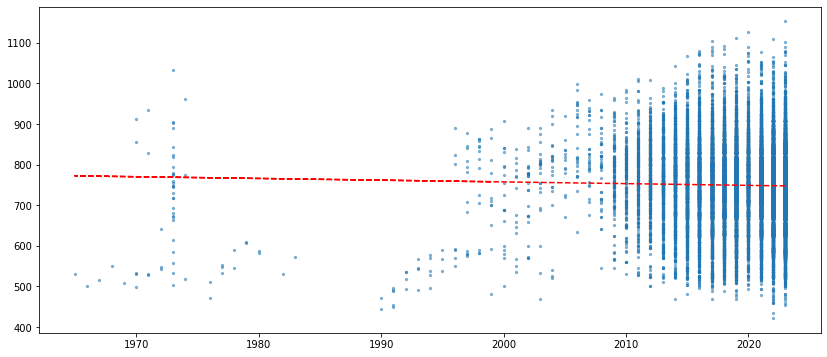

In [74]:
z = np.polyfit(meetsTop450['Year'], meetsTop450['TotalKg'], 1)
p = np.poly1d(z)

plt.figure(figsize=(14,6))
plt.scatter(meetsTop450['Year'], meetsTop450['TotalKg'], alpha=0.5, s=5)
plt.plot(meetsTop450['Year'], p(meetsTop450['Year']), linestyle='dashed', label='Trendline average weight lifter', c='red')
plt.show()

In [75]:
# changes in composition of weightlifting total poundage. 

In [76]:
meetsTotalComposition = meets.groupby('Year')[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']].mean().reset_index()
meetsTotalComposition

Year  Best3SquatKg  Best3BenchKg  Best3DeadliftKg
0   1964    190.294286    127.322500       238.461429
1   1965    200.173864    141.510455       238.311591
2   1966    205.548382    143.268841       236.544462
3   1967    198.286977    133.944091       231.344118
4   1968    210.483014    138.180971       240.882571
..   ...           ...           ...              ...
56  2020    160.234859    105.125249       174.440617
57  2021    167.849036    110.869309       185.183493
58  2022    174.166132    112.663615       193.279394
59  2023    174.752465    112.374962       197.789851
60  2024    184.531250    124.027778       202.222222

[61 rows x 4 columns]

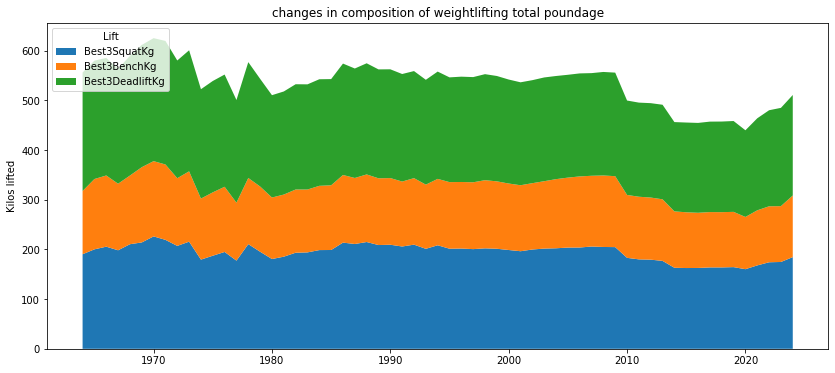

In [77]:
fig, ax = plt.subplots(figsize=(14,6))
labels = ['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']

ax.stackplot(meetsTotalComposition['Year'],             
             meetsTotalComposition['Best3SquatKg'],
             meetsTotalComposition['Best3BenchKg'],
             meetsTotalComposition['Best3DeadliftKg'],
              labels=labels)
ax.legend(title='Lift', loc='upper left')
ax.set_ylabel('Kilos lifted')
ax.set_title('changes in composition of weightlifting total poundage')
plt.show()

In [78]:
# model that predicts TotalKg if we only know first attempt weights for the three lifts. (predict TotalKg at start event)

In [79]:
dummiesCat = pd.get_dummies(meets[['Sex', 'Event', 'Equipment']])
dummiesCat

Sex_F  Sex_M  Sex_Mx  Event_B  Event_BD  Event_D  Event_S  Event_SB  \
0            1      0       0        0         0        0        0         0   
1            1      0       0        0         0        0        0         0   
2            0      1       0        0         0        0        0         0   
3            0      1       0        0         0        0        0         0   
4            0      1       0        0         0        0        0         0   
...        ...    ...     ...      ...       ...      ...      ...       ...   
3043008      1      0       0        0         0        0        0         0   
3043009      1      0       0        0         0        0        0         0   
3043010      1      0       0        0         0        0        0         0   
3043011      1      0       0        0         0        0        0         0   
3043012      1      0       0        0         0        0        0         0   

         Event_SBD  Event_SD  Equipment_Multi-ply  Equipment_Raw  \
0                1         0                    0              1   
1                1         0                    0              1   
2                1         0                    0              1   
3                1         0                    0              1   
4                1         0                    0              1   
...            ...       ...                  ...            ...   
3043008          1         0                    0              0   
3043009          1         0                    0              0   
3043010          1         0                    0              0   
3043011          1         0                    0              0   
3043012          1         0                    0              0   

         Equipment_Single-ply  Equipment_Straps  Equipment_Unlimited  \
0                           0                 0                    0   
1                           0                 0                    0   
2                           0                 0                    0   
3                           0                 0                    0   
4                           0                 0                    0   
...                       ...               ...                  ...   
3043008                     1                 0                    0   
3043009                     1                 0                    0   
3043010                     1                 0                    0   
3043011                     1                 0                    0   
3043012                     1                 0                    0   

         Equipment_Wraps  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
3043008                0  
3043009                0  
3043010                0  
3043011                0  
3043012                0  

[3043013 rows x 16 columns]

In [80]:
varNum = abs(meets[['Squat1Kg', 'Bench1Kg', 'Deadlift1Kg', 'TotalKg', 'Wilks', 'Glossbrenner', 'Goodlift', 'Year']])
varNum

Squat1Kg  Bench1Kg  Deadlift1Kg  TotalKg   Wilks  Glossbrenner  \
0            75.0      50.0         95.0    247.5  282.18        249.42   
1            95.0      62.5        100.0    282.5  272.99        240.35   
2            85.0      55.0         90.0    267.5  206.49        200.45   
3           125.0     115.0        150.0    430.0  334.94        325.32   
4            80.0      40.0        112.5    265.0  193.55        187.29   
...           ...       ...          ...      ...     ...           ...   
3043008     235.0     175.0        200.0    645.0  525.14        447.12   
3043009     237.5     182.5        185.0    632.5  511.26        434.61   
3043010     210.0     190.0        185.0    617.5  501.32        426.60   
3043011     210.0     140.0        145.0    515.0  409.13        345.98   
3043012     247.5     220.0        170.0      NaN     NaN           NaN   

         Goodlift  Year  
0           57.10  2019  
1           56.76  2019  
2           41.24  2019  
3           66.68  2019  
4           39.34  2019  
...           ...   ...  
3043008     93.16  2016  
3043009     90.57  2016  
3043010     88.89  2016  
3043011     72.24  2016  
3043012       NaN  2016  

[3043013 rows x 8 columns]

In [81]:
wholeSet = pd.concat([varNum, dummiesCat], axis=1)
wholeSet = wholeSet.dropna()
wholeSet

Squat1Kg  Bench1Kg  Deadlift1Kg  TotalKg   Wilks  Glossbrenner  \
0            75.0      50.0         95.0    247.5  282.18        249.42   
1            95.0      62.5        100.0    282.5  272.99        240.35   
2            85.0      55.0         90.0    267.5  206.49        200.45   
3           125.0     115.0        150.0    430.0  334.94        325.32   
4            80.0      40.0        112.5    265.0  193.55        187.29   
...           ...       ...          ...      ...     ...           ...   
3043007     250.0     150.0        205.0    647.5  548.04        473.70   
3043008     235.0     175.0        200.0    645.0  525.14        447.12   
3043009     237.5     182.5        185.0    632.5  511.26        434.61   
3043010     210.0     190.0        185.0    617.5  501.32        426.60   
3043011     210.0     140.0        145.0    515.0  409.13        345.98   

         Goodlift  Year  Sex_F  Sex_M  ...  Event_S  Event_SB  Event_SBD  \
0           57.10  2019      1      0  ...        0         0          1   
1           56.76  2019      1      0  ...        0         0          1   
2           41.24  2019      0      1  ...        0         0          1   
3           66.68  2019      0      1  ...        0         0          1   
4           39.34  2019      0      1  ...        0         0          1   
...           ...   ...    ...    ...  ...      ...       ...        ...   
3043007     97.41  2016      1      0  ...        0         0          1   
3043008     93.16  2016      1      0  ...        0         0          1   
3043009     90.57  2016      1      0  ...        0         0          1   
3043010     88.89  2016      1      0  ...        0         0          1   
3043011     72.24  2016      1      0  ...        0         0          1   

         Event_SD  Equipment_Multi-ply  Equipment_Raw  Equipment_Single-ply  \
0               0                    0              1                     0   
1               0                    0              1                     0   
2               0                    0              1                     0   
3               0                    0              1                     0   
4               0                    0              1                     0   
...           ...                  ...            ...                   ...   
3043007         0                    0              0                     1   
3043008         0                    0              0                     1   
3043009         0                    0              0                     1   
3043010         0                    0              0                     1   
3043011         0                    0              0                     1   

         Equipment_Straps  Equipment_Unlimited  Equipment_Wraps  
0                       0                    0                0  
1                       0                    0                0  
2                       0                    0                0  
3                       0                    0                0  
4                       0                    0                0  
...                   ...                  ...              ...  
3043007                 0                    0                0  
3043008                 0                    0                0  
3043009                 0                    0                0  
3043010                 0                    0                0  
3043011                 0                    0                0  

[844982 rows x 24 columns]

In [82]:
sampleFrac = wholeSet.sample(frac=0.025)

In [83]:
X = sampleFrac[['Squat1Kg', 'Bench1Kg', 'Deadlift1Kg', 'Wilks',
       'Glossbrenner', 'Goodlift', 'Year', 'Sex_F', 'Sex_M', 'Sex_Mx',
       'Event_B', 'Event_BD', 'Event_D', 'Event_S', 'Event_SB', 'Event_SBD',
       'Event_SD', 'Equipment_Multi-ply', 'Equipment_Raw',
       'Equipment_Single-ply', 'Equipment_Straps', 'Equipment_Unlimited',
       'Equipment_Wraps']]
y = sampleFrac['TotalKg']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1234) # 0.25 x 0.8 = 0.2

In [85]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=1234)
model_dt = dt.fit(X_train, y_train)
dt_predictions = model_dt.predict(X_test)

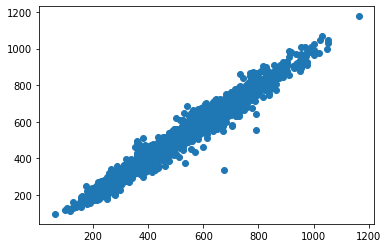

In [86]:
plt.scatter(dt_predictions, y_test)

In [87]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(dt_predictions, y_test))

27.82359553333046

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1234)
model_rf = rf.fit(X_train, y_train)
rf_predictions = model_rf.predict(X_test)

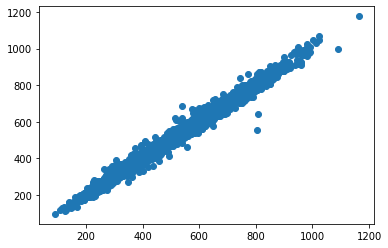

In [89]:
plt.scatter(rf_predictions, y_test)

In [90]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(rf_predictions, y_test))

19.23680689601814

In [91]:
# cross validate result for Random Forest regressor.

In [92]:
from sklearn.model_selection import KFold

k = 5
kf_5 = KFold(n_splits = k)
model_rfr = rf
rfr_rmse_CV_list = []
rfr_rmse_test_list = []

for train_index, test_index in kf_5.split(X_train):
    X_train_CV, X_test_CV = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_CV, y_test_CV = y.iloc[train_index], y.iloc[test_index]
    model_rfr.fit(X_train_CV, y_train_CV)

    #Target prediction & F1 score using the 10 rows left out from CV.
    y_pred_CV = model_rfr.predict(X_test_CV)
    rfr_rmse_CV = np.sqrt(mean_squared_error(y_test_CV, y_pred_CV))
    rfr_rmse_CV_list.append(rfr_rmse_CV)

    #Target prediction & F1 score using the rows from your test split.
    y_pred_test = model_rfr.predict(X_test)
    rfr_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rfr_rmse_test_list.append(rfr_rmse_test)

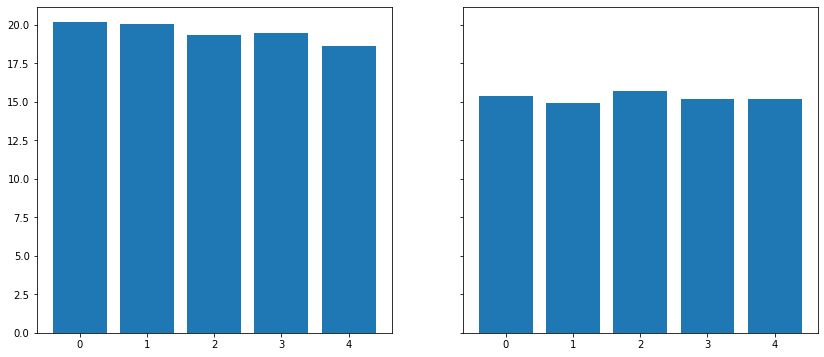

In [93]:
fig, ax = plt.subplots(1,2, figsize=(14,6), sharey=True)
ax[0].bar(np.arange(5), pd.Series(rfr_rmse_CV_list))
ax[1].bar(np.arange(5), pd.Series(rfr_rmse_test_list))
plt.show()

In [94]:
# hypertune Random Forest model. 

In [95]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [96]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

# create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [97]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=1234, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 1.1min


/home/jan-willem/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time= 1.5min
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time= 1.5min


/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time= 1.4min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  29.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  11.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  12.0s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  20.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  33.9s


/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time= 2.0min
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  12.0s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  20.1s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  20.5s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  35.0s


/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time= 1.4min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 1.7min


/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   9.8s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time= 1.5min
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  20.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  12.6s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  34.2s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time= 1.4min
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  34.3s
[CV] END bootstrap=False, max_depth=60,

/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   6.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   6.3s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  44.7s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   7.7s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=  15.9s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time= 2.0min


/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 1.2min
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   7.5s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=  16.2s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time= 1.0min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=  27.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.1s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  12.8s
[CV] END bootstrap=False, max_depth=11

/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1234),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1234, verbose=2)

In [98]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [99]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)


best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 5.9377 degrees.
Accuracy = 98.70%.
Model Performance
Average Error: 0.0073 degrees.
Accuracy = 100.00%.
Improvement of 1.31%.


In [100]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [False],
 'max_depth': [60, 70, 80],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [1, 2, 3],
 'n_estimators': [600, 700, 800, 900, 1000]}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [101]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time= 1.5min
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  15.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  15.7s


/home/jan-willem/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   9.8s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time= 1.9min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  12.6s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  33.8s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.7s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, max_depth=50,

[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time= 1.4min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  27.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 1.7min
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 1.1min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  27.6s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time= 1.0min
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  19.6s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=900; total time=  22.8s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  17.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  11.9s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  15.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, m

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  23.5s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=  14.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  18.8s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=700; total time=  15.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  19.9s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=  18.6s
[CV] END bootstrap=False, max_depth=70,

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  16.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=900; total time=  22.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  11.8s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  16.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  11.9s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=700; total time=  13.9s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  21.3s
[CV] END bootstrap=False, max_depth=80, 

/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/home/jan-willem/.local/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File 

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [60, 70, 80],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [600, 700, 800, 900, 1000]},
             verbose=2)

In [102]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 900}

In [103]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train, y_train)

Model Performance
Average Error: 0.0072 degrees.
Accuracy = 100.00%.


In [104]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.31%.


In [105]:
# train final model on most of the dataset with a test set to demonstrate results.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

final_rfr_model = RandomForestRegressor(bootstrap = False,
 max_depth = 60,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 3,
 n_estimators = 1000)

frac = wholeSet.sample(frac=0.1)

X_final = frac[['Squat1Kg', 'Bench1Kg', 'Deadlift1Kg', 'Wilks',
       'Glossbrenner', 'Goodlift', 'Year', 'Sex_F', 'Sex_M', 'Sex_Mx',
       'Event_B', 'Event_BD', 'Event_D', 'Event_S', 'Event_SB', 'Event_SBD',
       'Event_SD', 'Equipment_Multi-ply', 'Equipment_Raw',
       'Equipment_Single-ply', 'Equipment_Straps', 'Equipment_Unlimited',
       'Equipment_Wraps']]
y_final = frac['TotalKg']
X_train_fin, X_test_fin, y_train_fin, y_test_fin = train_test_split(X_final, y_final, test_size=0.1)
final_rfr_model_trained = final_rfr_model.fit(X_train_fin, y_train_fin)

In [106]:
final_rfr_model_trained.predict(X_test_fin.iloc[0:20,:])

array([408.883565  , 310.02025   , 610.54022   , 484.632695  ,
       374.1963    , 465.615875  , 303.16644   , 439.455425  ,
       640.34464   , 426.79538333, 352.556635  , 691.32228   ,
       430.681335  , 449.005975  , 661.94096   , 359.99335   ,
       493.64143   , 627.83833   , 464.755155  , 352.35558333])

In [107]:
y_test_fin.iloc[0:20]

80295      410.0
2285494    287.5
2018090    610.0
1982593    490.0
1689394    375.0
333061     490.0
2458014    310.0
667830     460.0
540768     637.5
2365112    420.0
1627537    357.5
1591918    700.0
2194538    402.5
1596494    445.0
417493     675.0
439551     365.0
1657939    500.0
2058012    640.0
407097     465.0
425273     347.5
Name: TotalKg, dtype: float64

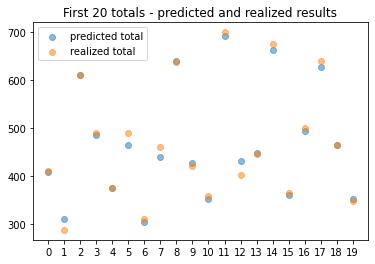

In [108]:
plt.scatter(np.arange(20),final_rfr_model_trained.predict(X_test_fin.iloc[0:20,:]), alpha=0.5, label='predicted total')
plt.scatter(np.arange(20), y_test_fin.iloc[0:20], alpha=0.5, label='realized total')
plt.title('First 20 totals - predicted and realized results')
plt.xticks(ticks=np.arange(0,20))
plt.legend()
plt.show()

In [109]:
# does our model overestimate or underestimate the total lifted?
predicted = pd.Series(final_rfr_model_trained.predict(X_test_fin))
predicted.head(5)

0    408.883565
1    310.020250
2    610.540220
3    484.632695
4    374.196300
dtype: float64

In [110]:
realized = pd.Series(y_test_fin).reset_index()
realized.head(5)

index  TotalKg
0    80295    410.0
1  2285494    287.5
2  2018090    610.0
3  1982593    490.0
4  1689394    375.0

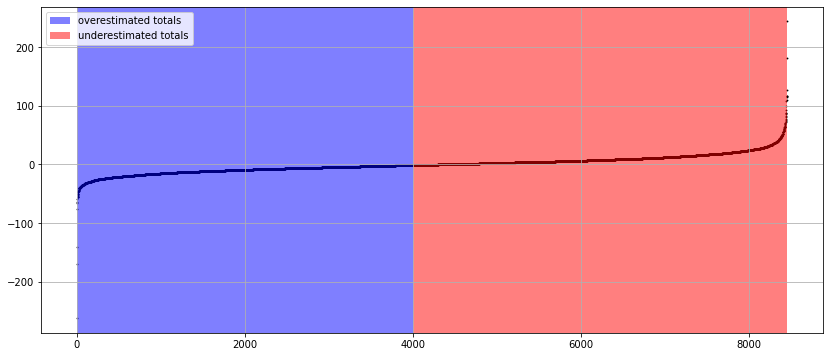

In [111]:
results_model = pd.concat([predicted, realized['TotalKg']], axis=1).rename(columns={0:'predicted','TotalKg':'realized'})
results_model['difference'] = results_model['realized'] - results_model['predicted']
results_model = results_model.sort_values('difference', ascending=True)

plt.figure(figsize=(14,6))
plt.scatter(np.arange(results_model.shape[0]), results_model['difference'], s=0.75, c='black')
plt.axvspan(0, 4000, facecolor='b', alpha=0.5, label='overestimated totals')
plt.axvspan(4000, results_model.shape[0], facecolor='r', alpha=0.5, label='underestimated totals')
plt.legend()
plt.grid()